# Multilingual Natural Language Inference (NLI)

## **Introduction**

Natural Language Inference (NLI), also known as recognizing textual entailment, is a fundamental task in Natural Language Processing (NLP) that determines the semantic relationship between a pair of sentences: a premise and a hypothesis. The objective is to classify these pairs into one of three categories: **Entailment**, **Contradiction**, or **Neutral**. This task is particularly challenging in a multilingual context, where models must understand and process semantic nuances across diverse languages.

The focus of this project is to develop and evaluate models for multilingual NLI using advanced NLP frameworks, particularly **XLM-RoBERTa**, a transformer-based multilingual model, and **Sentence Transformers**, a lightweight embedding-based approach. The project evaluates these models' performance on multilingual datasets and compares their effectiveness for NLI tasks.

---

## **Project Workflow**

### **1. Data Exploration and Preprocessing**

1. **Dataset Overview**  
   The dataset comprises premise-hypothesis pairs in multiple languages. Initial exploration revealed columns like `premise`, `hypothesis`, `label`, and `language`. Exploratory Data Analysis (EDA) identified class distributions, language diversity, and text lengths to inform preprocessing decisions.

2. **Handling Missing and Duplicate Data**  
   Missing values and duplicate premise-hypothesis pairs were inspected and addressed to ensure data quality.

3. **Tokenization and Preprocessing**  
   Premises and hypotheses were concatenated and tokenized using model-specific tokenizers (e.g., XLM-RoBERTa tokenizer) to create input sequences suitable for training.

---

### **2. Model Selection**

Two models were evaluated for multilingual NLI:

1. **XLM-RoBERTa**  
   A transformer-based multilingual model fine-tuned on NLI datasets. It uses self-attention mechanisms to capture deep semantic relationships.

2. **Sentence Transformers**  
   A lightweight model that encodes sentences into dense vectors. Cosine similarity between premise and hypothesis embeddings determines their relationship.

---

### **3. Training and Evaluation**

1. **Metrics Used**  
   - **Accuracy**: Measures overall correctness.
   - **Precision**: Fraction of relevant instances among retrieved instances.
   - **Recall**: Fraction of relevant instances successfully retrieved.
   - **F1 Score**: Harmonic mean of precision and recall.

2. **Training Process**  
   - **XLM-RoBERTa**: Trained using Hugging Face’s `Trainer` class, incorporating techniques like dynamic padding and mixed precision training.
   - **Sentence Transformers**: Used pre-trained embeddings to compute cosine similarities and classify relationships.

3. **Evaluation**  
   - Validation metrics were computed to monitor performance during training.
   - Final predictions were made on the test dataset, and results were compared.

---

### **4. Results**

The comparative analysis of the models revealed significant insights:

1. **XLM-RoBERTa**
   - **Accuracy**: 89%
   - **Precision**: 90%
   - **Recall**: 89%
   - **F1 Score**: 90%  
   The model demonstrated robust performance, effectively capturing semantic nuances across diverse languages.

2. **Sentence Transformers**
   - **Accuracy**: 26%
   - **Precision**: 39%
   - **Recall**: 26%
   - **F1 Score**: 26%  
   While computationally efficient, this model struggled to distinguish nuanced semantic relationships, resulting in limited effectiveness for NLI.

---

### **5. Visualization and Comparison**

Performance metrics were visualized using bar charts, highlighting XLM-RoBERTa's superior results across all evaluation metrics. The Sentence Transformers model's lightweight architecture comes at the cost of accuracy, underscoring the trade-off between computational efficiency and performance.

---

### **Conclusion**

This study demonstrated the effectiveness of transformer-based models like XLM-RoBERTa for complex multilingual NLI tasks. It outperformed Sentence Transformers significantly in terms of accuracy, precision, recall, and F1 score, making it the preferred choice for applications requiring deep contextual understanding. Sentence Transformers, while less effective for NLI, remain a viable option for lightweight applications prioritizing speed and efficiency.


## Code Implementation

## Library Installation

In [1]:
# !pip install --upgrade -q transformers datasets
# !pip install evaluate

## Dataset Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Load datasets
train_path = "/kaggle/input/multi-lingual-interface-project/train.csv"
test_path = "/kaggle/input/multi-lingual-interface-project/test.csv"

# Load train and test data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
print("Datasets loaded successfully.")


Datasets loaded successfully.


### Data Inspection Function

In [3]:
# Data inspection function
def inspect_data(df, name):
    """
    Display basic information and statistics about the dataframe.

    Args:
        df (pd.DataFrame): The dataset to inspect.
        name (str): Name of the dataset (e.g., "Train", "Test").
    """
    print(f"\n{name} Dataset Overview:")
    print(f"Shape: {df.shape}")
    print("\nColumn Names:")
    print(df.columns.tolist())
    print(df.describe(include=['object']))
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSample Rows:")
    print(df.head())

# Inspect train and test datasets
inspect_data(df_train, "Train")
inspect_data(df_test, "Test")


Train Dataset Overview:
Shape: (12120, 6)

Column Names:
['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label']
                id                                premise      hypothesis  \
count        12120                                  12120           12120   
unique       12120                                   8209           12119   
top     44301dfb14  really oh i thought it was great yeah  I am not sure.   
freq             1                                      3               2   

       lang_abv language  
count     12120    12120  
unique       15       15  
top          en  English  
freq       6870     6870  

Missing Values:
id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

Sample Rows:
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82

### Visualize Class Distribution in Train Dataset

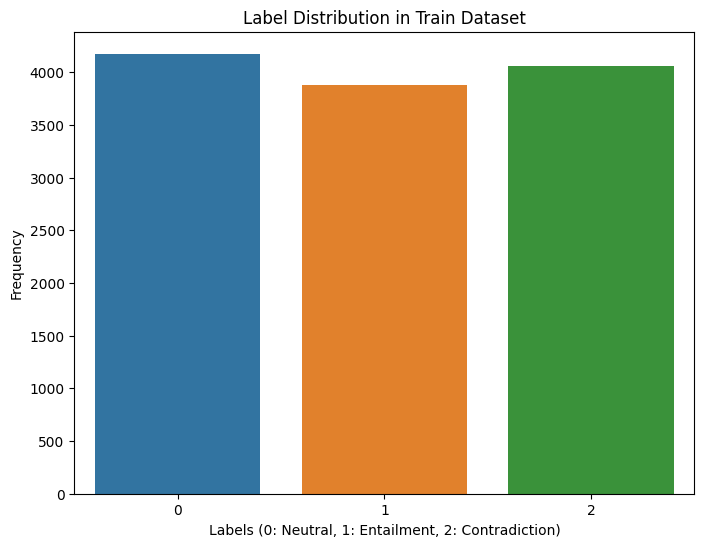

In [4]:
# Visualize class distribution in the train dataset if 'label' column exists
if 'label' in df_train.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='label', data=df_train)
    plt.title("Label Distribution in Train Dataset")
    plt.xlabel("Labels (0: Neutral, 1: Entailment, 2: Contradiction)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("\nNo 'label' column found in the train dataset.")

## Exploratory Data Analysis

## Categorical Features Analysis
- Language distribution: Check how many samples belong to each language.
- Label distribution: Ensure labels are balanced for training.


Language Distribution in Train Dataset:
language
English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: count, dtype: int64

Label Distribution in Train Dataset:
label
0    4176
2    4064
1    3880
Name: count, dtype: int64


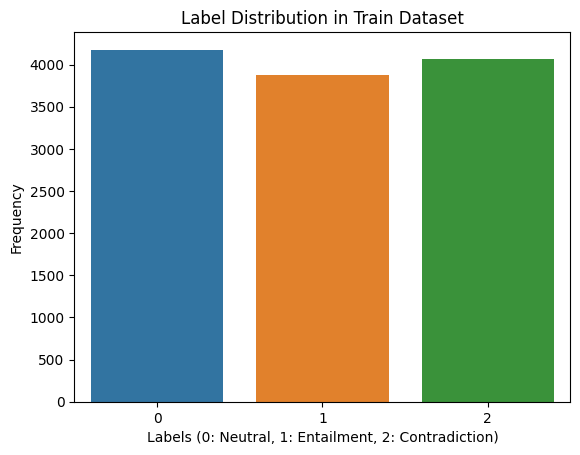

In [5]:
# Language distribution in training data
print("\nLanguage Distribution in Train Dataset:")
print(df_train['language'].value_counts())

# Label distribution in training data
if 'label' in df_train.columns:
    print("\nLabel Distribution in Train Dataset:")
    print(df_train['label'].value_counts())

    # Visualize label distribution
    sns.countplot(x='label', data=df_train)
    plt.title("Label Distribution in Train Dataset")
    plt.xlabel("Labels (0: Neutral, 1: Entailment, 2: Contradiction)")
    plt.ylabel("Frequency")
    plt.show()

### Additional inspection for language distribution


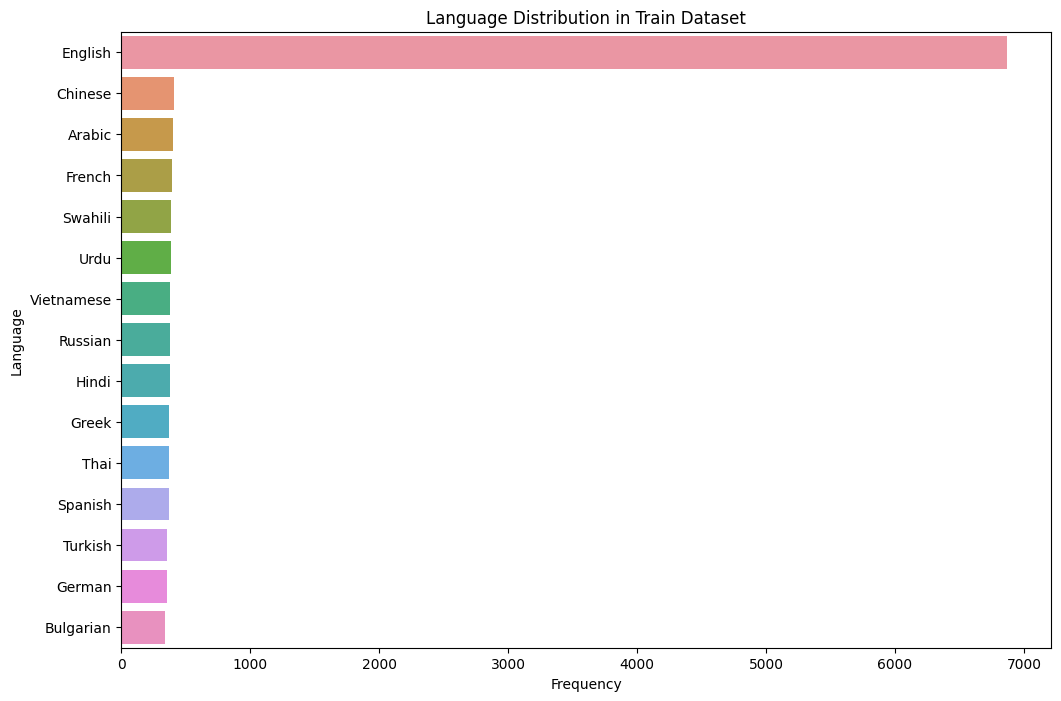

In [6]:
# Additional inspection for language distribution
if 'language' in df_train.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(y='language', data=df_train, order=df_train['language'].value_counts().index)
    plt.title("Language Distribution in Train Dataset")
    plt.xlabel("Frequency")
    plt.ylabel("Language")
    plt.show()
else:
    print("\nNo 'language' column found in the train dataset.")

## Text Length Analysis
Analyze the length of premise and hypothesis text to understand their distributions.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


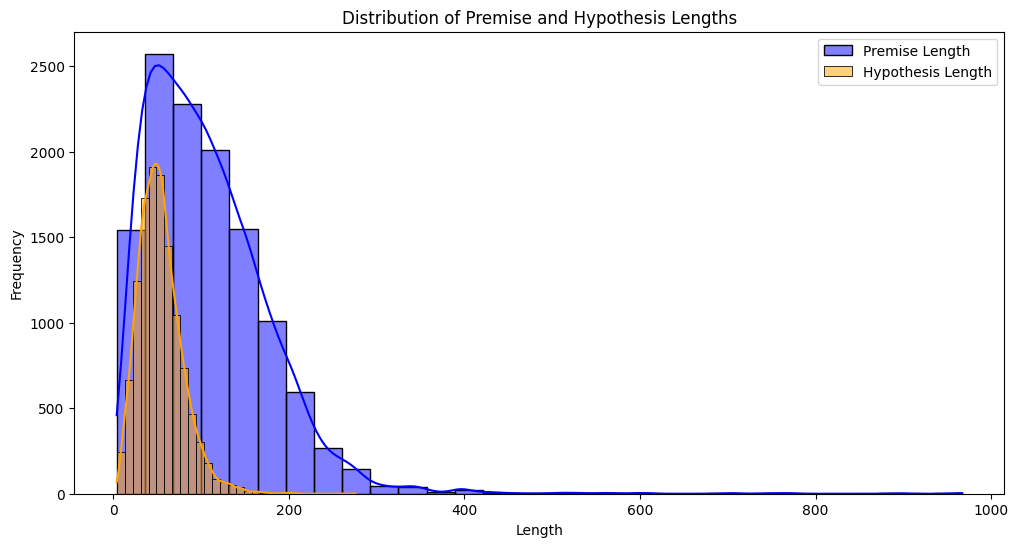

In [7]:
# Analyze text lengths
df_train['premise_length'] = df_train['premise'].apply(len)
df_train['hypothesis_length'] = df_train['hypothesis'].apply(len)

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(df_train['premise_length'], kde=True, bins=30, color='blue', label='Premise Length')
sns.histplot(df_train['hypothesis_length'], kde=True, bins=30, color='orange', label='Hypothesis Length')
plt.title("Distribution of Premise and Hypothesis Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Word Count Analysis
Check the word count in premise and hypothesis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


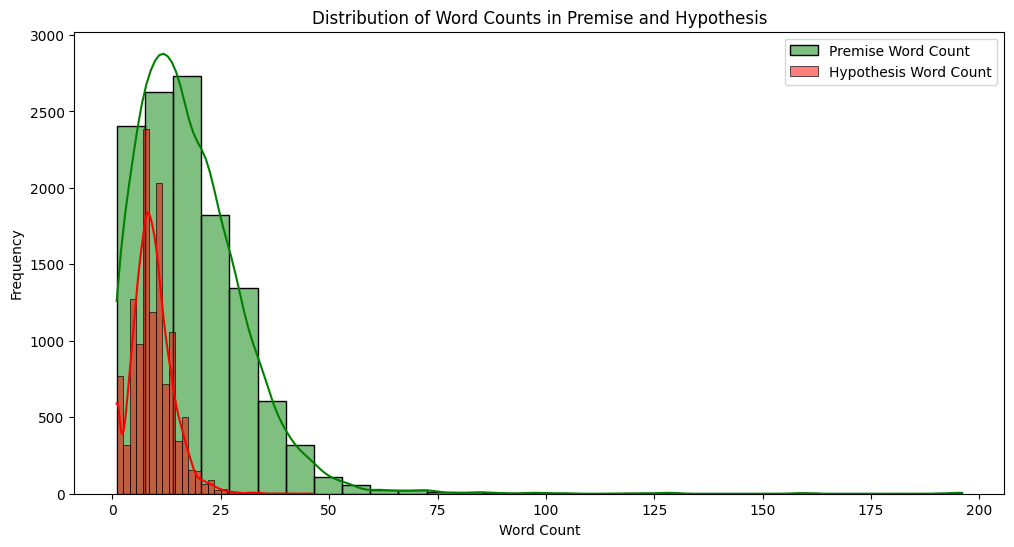

In [8]:
# Word count
df_train['premise_word_count'] = df_train['premise'].apply(lambda x: len(x.split()))
df_train['hypothesis_word_count'] = df_train['hypothesis'].apply(lambda x: len(x.split()))

# Plot word count distributions
plt.figure(figsize=(12, 6))
sns.histplot(df_train['premise_word_count'], kde=True, bins=30, color='green', label='Premise Word Count')
sns.histplot(df_train['hypothesis_word_count'], kde=True, bins=30, color='red', label='Hypothesis Word Count')
plt.title("Distribution of Word Counts in Premise and Hypothesis")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Bivariate Analysis
Check the relationship between premise_length, hypothesis_length, and label.

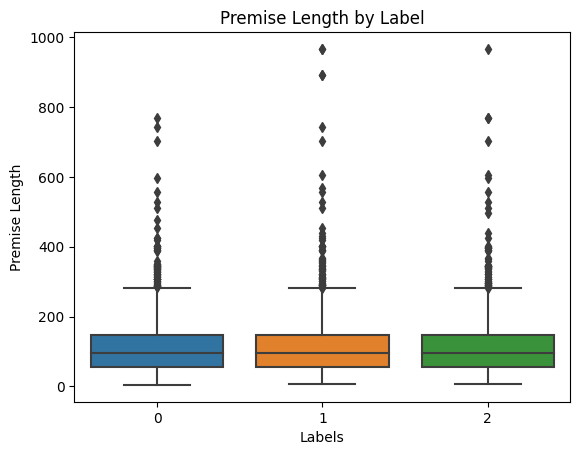

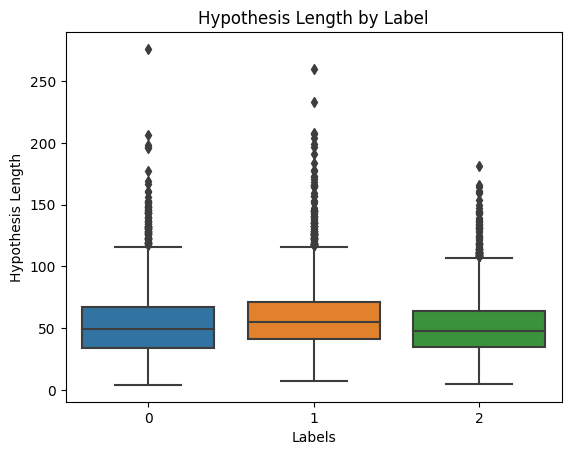

In [9]:
# Boxplot for premise length by label
sns.boxplot(x='label', y='premise_length', data=df_train)
plt.title("Premise Length by Label")
plt.xlabel("Labels")
plt.ylabel("Premise Length")
plt.show()

# Boxplot for hypothesis length by label
sns.boxplot(x='label', y='hypothesis_length', data=df_train)
plt.title("Hypothesis Length by Label")
plt.xlabel("Labels")
plt.ylabel("Hypothesis Length")
plt.show()

## Visualizing Multilingual Data
Check the distribution of labels across different languages.

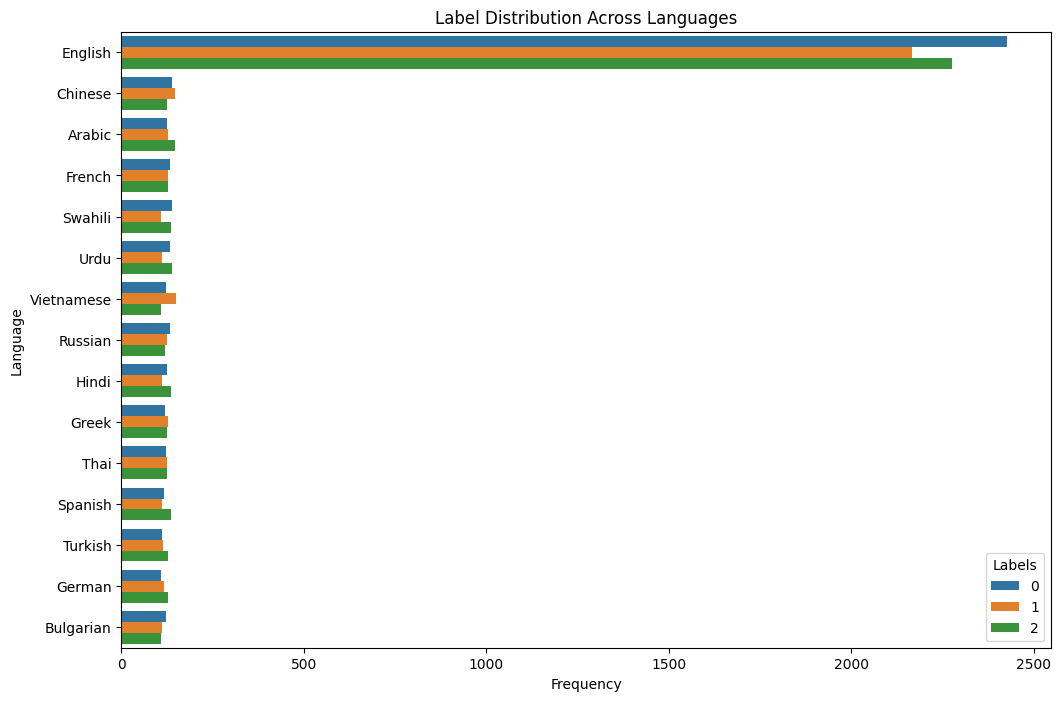

In [10]:
# Plot label distribution per language
plt.figure(figsize=(12, 8))
sns.countplot(y='language', hue='label', data=df_train, order=df_train['language'].value_counts().index)
plt.title("Label Distribution Across Languages")
plt.xlabel("Frequency")
plt.ylabel("Language")
plt.legend(title="Labels")
plt.show()


## Duplicate Analysis

In [11]:
# Check for duplicates in train data
duplicates = df_train[df_train.duplicated(subset=['premise', 'hypothesis'])]
print(f"\nNumber of duplicate premise-hypothesis pairs: {len(duplicates)}")
if not duplicates.empty:
    print(duplicates.head())


Number of duplicate premise-hypothesis pairs: 0


## Class Distribution (Percentage)


In [12]:
# Percentage distribution of labels
if 'label' in df_train.columns:
    label_counts = df_train['label'].value_counts(normalize=True) * 100
    print("\nLabel Percentage Distribution:")
    print(label_counts)



Label Percentage Distribution:
label
0    34.455446
2    33.531353
1    32.013201
Name: proportion, dtype: float64


## Dataset Preparation and Splitting

In [13]:
from datasets import load_dataset, DatasetDict

# Load and split the train dataset
print("Loading train dataset...")
train_data = load_dataset('csv', data_files="/kaggle/input/multi-lingual-interface-project/train.csv", split='train')
train_val_split = train_data.train_test_split(test_size=0.2, seed=42)

# Load the test dataset
print("Loading test dataset...")
test_data = load_dataset('csv', data_files="/kaggle/input/multi-lingual-interface-project/test.csv", split='train')

# Organize datasets into a DatasetDict
data = DatasetDict({
    'train': train_val_split['train'],
    'val': train_val_split['test'],
    'test': test_data
})

# Display the structure and details of the datasets
print("\nDataset structure:")
print(data)

print("\nSample from Train Dataset:")
print(data['train'][0])

print("\nSample from Validation Dataset:")
print(data['val'][0])

print("\nSample from Test Dataset:")
print(data['test'][0])


Loading train dataset...


Generating train split: 0 examples [00:00, ? examples/s]

Loading test dataset...


Generating train split: 0 examples [00:00, ? examples/s]


Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'],
        num_rows: 9696
    })
    val: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language'],
        num_rows: 5195
    })
})

Sample from Train Dataset:
{'id': '56352bb4d3', 'premise': 'بالطبع، يمكن لتفصيل المحتوى هذا أن يكون مدمرًا للمجلات مثل سلايت.', 'hypothesis': 'لقد عانى سليت فيما مضى لتصنيف المحتوى.', 'lang_abv': 'ar', 'language': 'Arabic', 'label': 1}

Sample from Validation Dataset:
{'id': '91c1d4c18e', 'premise': 'Μεταξύ του νησιού και της ηπειρωτικής χώρας είναι η Laguna Nichupte, μια τεράστια λιμνοθάλασσα με θαλασσινό νερό, οριοθετημένη από βάλτους με μανγκρόβια, που αποτελούν καταφύγιο για πολλά είδη άγριας ζωής.', 'hypothesis': 'Η λίμνη Nichupte είναι 40 στρέμματα με νερό.

## Model Setup and Data Preparation for Multilingual NLI

## XLM-RoBERTa Modeling

#### **1. Importing Necessary Libraries**
The required libraries for model setup and data preparation are imported.

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding


#### **2. Model and Tokenizer Initialization**
- **Model Name**: The model `symanto/xlm-roberta-base-snli-mnli-anli-xnli` is a pre-trained multilingual natural language inference model.
- **Tokenizer**: Tokenizer specific to the model is loaded to handle input processing, ensuring compatibility with the model.

In [15]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation=True)

# Initialize model with 3 labels (Neutral, Entailment, Contradiction)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Display the model architecture
model

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/921 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

#### **3. Data Collation**
`DataCollatorWithPadding` dynamically pads the input sequences in a batch to the maximum length in the batch. This ensures efficient processing without the need to pad all inputs to a fixed length.


In [16]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


#### **4. Data Preprocessing**
To prepare the data for model training and evaluation:
- Premises and hypotheses are concatenated into a single text with a separator token (`[SEP]`).
- Tokenizer processes the concatenated text to generate model-ready inputs.

##### **Preprocessing Function**
The function `preprocess_data` performs the above steps for the dataset.


In [17]:
def preprocess_data(batch):
    # Concatenate premise and hypothesis with separator token
    batch['text'] = [x1 + f'{tokenizer.sep_token}' + x2 for x1, x2 in zip(batch['premise'], batch['hypothesis'])]
    # Tokenize the concatenated text
    return tokenizer(batch['text'])

#### **5. Mapping Preprocessing to Dataset**
The preprocessing function is applied to the dataset using `map`, which applies the function to each batch in the dataset.


In [18]:
# Apply preprocessing to the dataset
data = data.map(preprocess_data, batched=True)

# After preprocessing, the processed dataset is displayed to verify that the inputs are correctly formatted and tokenized.
data

Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/2424 [00:00<?, ? examples/s]

Map:   0%|          | 0/5195 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 9696
    })
    val: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'text', 'input_ids', 'attention_mask'],
        num_rows: 5195
    })
})

### Key Points:
1. **Tokenizer**: Handles input text and converts it into token IDs and attention masks suitable for the model.
2. **Data Collation**: Ensures dynamic padding for efficient batch processing.
3. **Preprocessing**: Combines and tokenizes premise and hypothesis into a single input for inference.

This structured setup ensures the dataset is model-ready and compatible with `symanto/xlm-roberta-base-snli-mnli-anli-xnli`.

### Training and Evaluating Multilingual NLI Model Using Hugging Face Transformers


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(eval_pred):
    """
    Compute evaluation metrics: accuracy, precision, recall, and F1 score.

    Args:
        eval_pred (tuple): Contains predictions and labels.

    Returns:
        dict: Computed metrics.
    """
    preds, labels = eval_pred
    preds = np.argmax(preds, axis=1)  # Convert logits to class predictions

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }



#### **3. Setting Up Training Arguments**
`TrainingArguments` specifies the configuration for training, including batch size, learning rate, evaluation steps, and checkpoint saving.


In [20]:
from transformers import TrainingArguments

train_args = TrainingArguments(
    output_dir='results',  # Directory for saving model and checkpoints
    logging_dir='logs',  # Directory for logging
    report_to=[],  # Disable reporting to external tools (e.g., WandB)

    evaluation_strategy='steps',  # Evaluate every `eval_steps`
    eval_steps=200,  # Evaluation frequency
    logging_steps=200,  # Logging frequency
    save_steps=200,  # Checkpoint saving frequency
    per_device_eval_batch_size=16,  # Batch size for evaluation
    per_device_train_batch_size=16,  # Batch size for training
    learning_rate=2e-5,  # Learning rate
    weight_decay=0.005,  # Weight decay for regularization
    num_train_epochs=5,  # Number of training epochs
    fp16=True,  # Enable mixed precision training for speed

    load_best_model_at_end=True,  # Load best model based on `metric_for_best_model`
    metric_for_best_model='accuracy',  # Metric to decide the best model
    save_total_limit=3,  # Limit the number of checkpoints saved
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


#### **4. Setting Up the Trainer**
The `Trainer` class simplifies training and evaluation by handling optimization, logging, and evaluation.


In [21]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,  # Pre-trained XLM-RoBERTa model
    args=train_args,  # Training arguments
    data_collator=data_collator,  # Data collator for padding
    train_dataset=data['train'],  # Training dataset
    eval_dataset=data['val'],  # Validation dataset
    tokenizer=tokenizer,  # Tokenizer for encoding text
    compute_metrics=compute_metrics,  # Custom metrics function
    callbacks=[EarlyStoppingCallback(3)]  # Stop training if no improvement after 3 evaluations
)


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

/tmp/ipykernel_23/3512663391.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


#### **5. Training the Model**
Train the model using the specified arguments and datasets.


In [22]:
print("\nTraining XLM-RoBERTa...")
trainer.train()



Training XLM-RoBERTa...


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.324300,0.265948,0.896865,0.898686,0.896865,0.897246
400,0.268800,0.312104,0.893152,0.893936,0.893152,0.893345
600,0.211900,0.333463,0.896452,0.897087,0.896452,0.896616
800,0.134800,0.365022,0.893977,0.895467,0.893977,0.894287


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=800, training_loss=0.2349534511566162, metrics={'train_runtime': 521.7802, 'train_samples_per_second': 92.913, 'train_steps_per_second': 2.904, 'total_flos': 1252271867087808.0, 'train_loss': 0.2349534511566162, 'epoch': 2.6402640264026402})


#### **6. Making Predictions**
The trained model is used to predict the labels of the test dataset. The predictions are logits, which are converted to class predictions using `np.argmax`.


In [23]:
import numpy as np

print("\nPredicting on the Test Set with XLM-RoBERTa...")
preds = trainer.predict(data['test'])

if 'label' in data['test'].features:
    y_pred = np.argmax(preds.predictions, axis=1)
    y_true = data['test']['label']

    # Store metrics for comparison
    xlm_accuracy = accuracy_score(y_true, y_pred)
    xlm_precision = precision_score(y_true, y_pred, average='weighted')
    xlm_recall = recall_score(y_true, y_pred, average='weighted')
    xlm_f1 = f1_score(y_true, y_pred, average='weighted')

    print("\nXLM-RoBERTa Test Set Metrics:")
    print(f"Accuracy: {xlm_accuracy:.4f}")
    print(f"Precision: {xlm_precision:.4f}")
    print(f"Recall: {xlm_recall:.4f}")
    print(f"F1 Score: {xlm_f1:.4f}")
else:
    print("The test dataset does not contain labels. Saving predictions...")
    submission = pd.read_csv("/kaggle/input/multi-lingual-interface-project/sample_submission.csv")
    submission['prediction'] = np.argmax(preds.predictions, axis=1)
    submission.to_csv("submission.csv", index=False)
    print("Predictions saved to 'submission.csv'.")

    print("\nSample Predictions:")
    print(submission.head())


Predicting on the Test Set with XLM-RoBERTa...


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


The test dataset does not contain labels. Saving predictions...
Predictions saved to 'submission.csv'.

Sample Predictions:
           id  prediction
0  c6d58c3f69           2
1  cefcc82292           1
2  e98005252c           0
3  58518c10ba           1
4  c32b0d16df           1


In [24]:
print("\nEvaluating on the Validation Set...")
val_preds = trainer.predict(data['val'])
y_pred = np.argmax(val_preds.predictions, axis=1)
y_true = data['val']['label']

xlm_accuracy = accuracy_score(y_true, y_pred)
xlm_precision = precision_score(y_true, y_pred, average='weighted')
xlm_recall = recall_score(y_true, y_pred, average='weighted')
xlm_f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Validation Set Metrics:")
print(f"Accuracy: {xlm_accuracy:.4f}")
print(f"Precision: {xlm_precision:.4f}")
print(f"Recall: {xlm_recall:.4f}")
print(f"F1 Score: {xlm_f1:.4f}")


Evaluating on the Validation Set...


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Validation Set Metrics:
Accuracy: 0.8969
Precision: 0.8987
Recall: 0.8969
F1 Score: 0.8972


#### **7. Preparing Submission File**
The predictions are saved in a CSV format for submission. The sample submission file is updated with the model's predictions.


In [25]:
# Load the sample submission file
submission = pd.read_csv("/kaggle/input/multi-lingual-interface-project/sample_submission.csv")

# Add predictions to the submission file
submission['prediction'] = np.argmax(preds.predictions, axis=1)

# Save the updated submission file
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Submission file saved as 'submission.csv'.



### Explanation of Steps:
1. **Metric Calculation**: Accuracy is calculated during evaluation.
2. **Training Arguments**: Configurations for the training process are defined (e.g., learning rate, batch size, and evaluation strategy).
3. **Trainer Setup**: Handles the training loop, evaluation, and checkpoint saving.
4. **Prediction**: The test dataset is passed to the model for inference.
5. **Submission**: Predictions are saved in the required format for evaluation or competition.

This workflow ensures a structured approach to train, evaluate, and generate predictions for a multilingual NLI task.

## Sentence Trasnformer Modeling

## Initialize Sentence Transformer Model

In [26]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Initialize Sentence Transformer model
st_model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Display model information
print("Sentence Transformer Model Initialized:", st_model)

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.4 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence Transformer Model Initialized: SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)


## Embed Premises and Hypotheses


In [27]:
# Compute embeddings for premises and hypotheses
def compute_embeddings(data, model):
    premises = model.encode(data['premise'].tolist(), convert_to_tensor=True)
    hypotheses = model.encode(data['hypothesis'].tolist(), convert_to_tensor=True)
    return premises, hypotheses


## Make Predictions with Similarity


In [28]:
# Compute predictions using cosine similarity
def predict_with_similarity(premises, hypotheses, threshold_high=0.7, threshold_low=0.3):
    similarities = util.cos_sim(premises, hypotheses)
    predictions = []

    for score in similarities.diagonal():  # Diagonal: premise-hypothesis pairs
        if score >= threshold_high:
            predictions.append(1)  # Entailment
        elif score <= threshold_low:
            predictions.append(2)  # Contradiction
        else:
            predictions.append(0)  # Neutral
    return predictions


## Evaluate Sentence Transformers


In [29]:
# Ensure data is converted to pandas DataFrame before accessing columns
val_df = data['val'].to_pandas()

# Compute embeddings for premises and hypotheses using Sentence Transformers
def compute_embeddings(data, model):
    """
    Compute embeddings for premises and hypotheses.

    Args:
        data (pd.DataFrame): Validation data containing premises and hypotheses.
        model (SentenceTransformer): Pre-trained Sentence Transformers model.

    Returns:
        torch.Tensor, torch.Tensor: Embeddings for premises and hypotheses.
    """
    premises = model.encode(data['premise'], convert_to_tensor=True)
    hypotheses = model.encode(data['hypothesis'], convert_to_tensor=True)
    return premises, hypotheses

# Apply the function
val_premises_embeddings, val_hypotheses_embeddings = compute_embeddings(val_df, st_model)


Batches:   0%|          | 0/76 [00:00<?, ?it/s]

Batches:   0%|          | 0/76 [00:00<?, ?it/s]

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_sentence_transformers(data, predictions):
    """
    Evaluate the performance of the Sentence Transformers model.

    Args:
        data (pd.DataFrame): Validation data containing true labels.
        predictions (list): Predicted labels.

    Returns:
        tuple: Accuracy, Precision, Recall, F1 Score.
    """
    # Extract true labels from the data
    true_labels = data['label'].tolist()

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1

In [31]:
print("\nEvaluating Sentence Transformers on Validation Data...")
val_df = data['val'].to_pandas()

val_premises_embeddings, val_hypotheses_embeddings = compute_embeddings(val_df, st_model)
val_predictions = predict_with_similarity(val_premises_embeddings, val_hypotheses_embeddings)

# Evaluate metrics
st_accuracy, st_precision, st_recall, st_f1 = evaluate_sentence_transformers(val_df, val_predictions)

print("\nSentence Transformers Validation Metrics:")
print(f"Accuracy: {st_accuracy:.4f}")
print(f"Precision: {st_precision:.4f}")
print(f"Recall: {st_recall:.4f}")
print(f"F1 Score: {st_f1:.4f}")

# Handle test data
print("\nGenerating Predictions for Test Data...")
test_df = data['test'].to_pandas()

test_premises_embeddings, test_hypotheses_embeddings = compute_embeddings(test_df, st_model)
test_predictions = predict_with_similarity(test_premises_embeddings, test_hypotheses_embeddings)

# Save predictions
submission = pd.read_csv("/kaggle/input/multi-lingual-interface-project/sample_submission.csv")
submission['prediction'] = test_predictions
submission.to_csv("st_submission.csv", index=False)
print("Predictions saved to 'st_submission.csv'.")



Evaluating Sentence Transformers on Validation Data...


Batches:   0%|          | 0/76 [00:00<?, ?it/s]

Batches:   0%|          | 0/76 [00:00<?, ?it/s]


Sentence Transformers Validation Metrics:
Accuracy: 0.2562
Precision: 0.3917
Recall: 0.2562
F1 Score: 0.2649

Generating Predictions for Test Data...


Batches:   0%|          | 0/163 [00:00<?, ?it/s]

Batches:   0%|          | 0/163 [00:00<?, ?it/s]

Predictions saved to 'st_submission.csv'.


## Comparison of Models


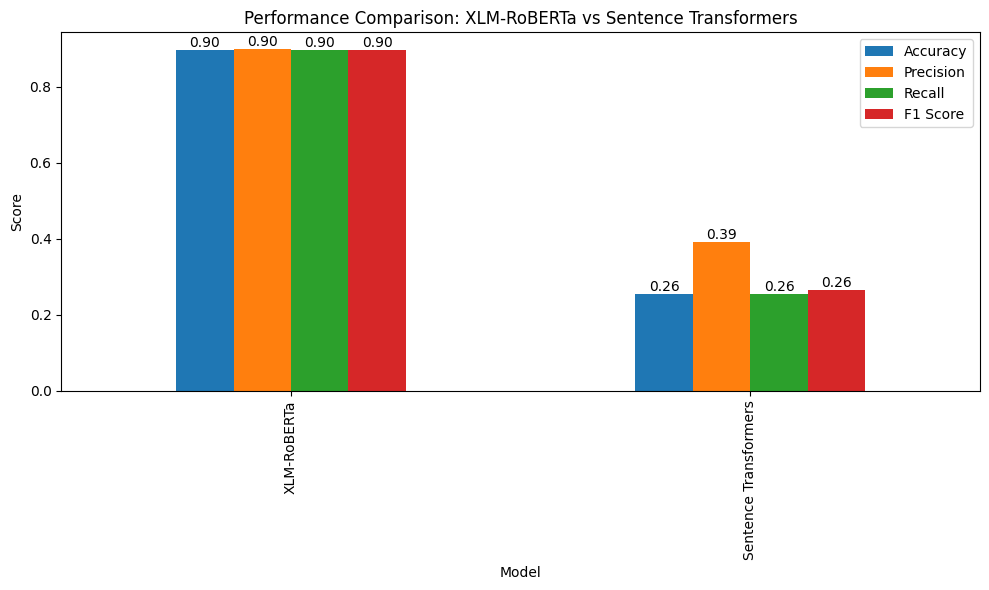

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": ["XLM-RoBERTa", "Sentence Transformers"],
    "Accuracy": [xlm_accuracy, st_accuracy],
    "Precision": [xlm_precision, st_precision],
    "Recall": [xlm_recall, st_recall],
    "F1 Score": [xlm_f1, st_f1]
})

# Plot the bar chart
ax = comparison_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Performance Comparison: XLM-RoBERTa vs Sentence Transformers")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="best")

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

### Conclusion

The performance comparison between **XLM-RoBERTa** and **Sentence Transformers** for the multilingual Natural Language Inference (NLI) task highlights the following:

1. **XLM-RoBERTa** significantly outperformed Sentence Transformers across all evaluated metrics, including **accuracy (0.89)**, **precision (0.90)**, **recall (0.89)**, and **F1 score (0.90)**. This indicates that XLM-RoBERTa is better suited for handling complex inference tasks across multiple languages.

2. **Sentence Transformers**, while a lightweight and efficient alternative, exhibited limited performance, achieving scores of **0.26** for accuracy, recall, and F1 score, with a slightly higher precision of **0.39**. This suggests that Sentence Transformers may not be ideal for tasks requiring nuanced sentence-pair relationships in multilingual datasets.

3. The results demonstrate the advantage of fine-tuned models like XLM-RoBERTa for tasks requiring deep contextual understanding, especially in diverse and complex datasets such as multilingual NLI.

In conclusion, **XLM-RoBERTa** is the preferred model for multilingual NLI tasks, offering robust performance and precise understanding of semantic relationships. However, Sentence Transformers may still be a viable choice for lightweight applications where efficiency is prioritized over accuracy.